# Task 3: Decision Tree Classification

## Objective

The objective of this task is to build a Decision Tree classifier to predict whether a customer will purchase a product or service based on demographic and behavioral data. The workflow includes data preprocessing, exploratory data analysis (EDA), model building, and performance evaluation.

**Step1: Import Libraries**

In [4]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style("whitegrid")


**Step2: Load Dataset**

In [7]:
df = pd.read_csv(r"C:\Users\admin\Documents\Prodigy Infotech\Prodigy_DS_03\bank+marketing\bank\bank-full.csv",
    sep=';')

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Step3: Data Understanding**

**Dataset Info**

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Statistical Summary**

In [9]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Check Missing Values**

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Step4: Basic EDA**

**Target distribution**

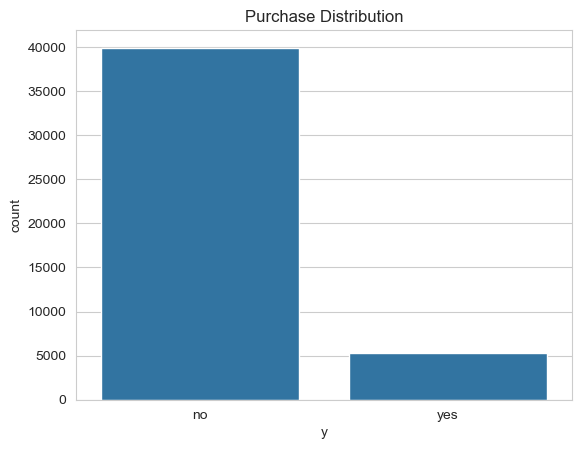

In [12]:
sns.countplot(x='y', data=df)
plt.title("Purchase Distribution")
plt.show()


**Purchase by Job**

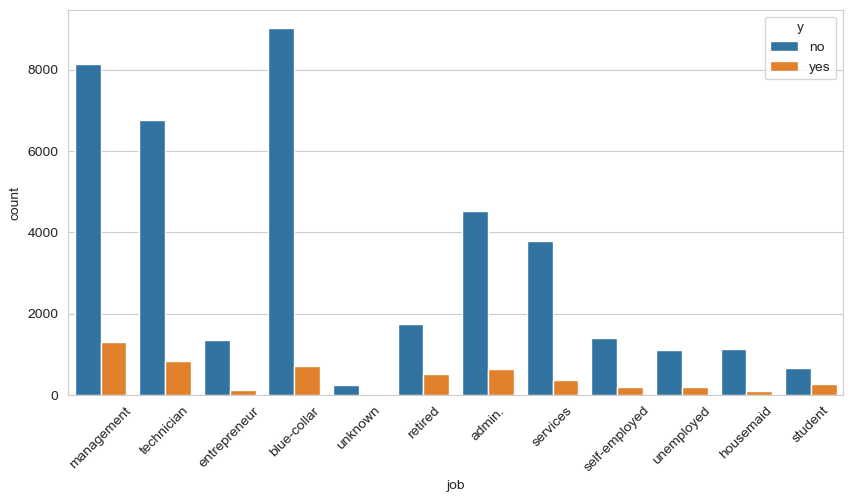

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()


**Purchase by Marital Status**

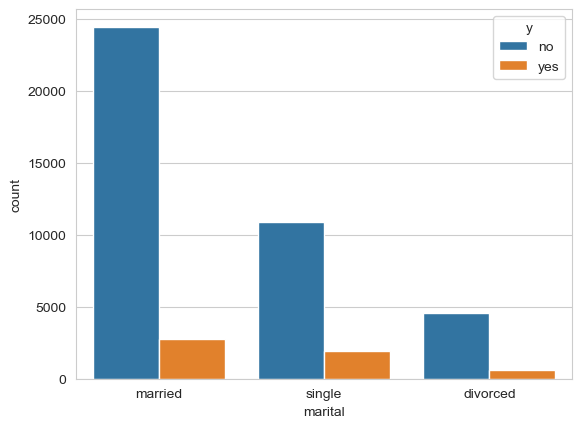

In [14]:
sns.countplot(x='marital', hue='y', data=df)
plt.show()


**Step5: Data Preprocessing**

**Convert categorical → numeric**

In [21]:
#Decision Tree needs numeric data.
df_encoded = pd.get_dummies(df, drop_first=True)


**Step6: Feature & Target Split**

In [22]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']


**Step7: Train Test Split**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Step8: Decision Tree Model**

In [24]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**Step9: Prediction**

In [25]:
y_pred = model.predict(X_test)


**Step10: Evaluation**

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8705075749198274

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.92      0.93      7952
        True       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043


Confusion Matrix:
[[7344  608]
 [ 563  528]]


**Step11: Decision Tree Visualization**

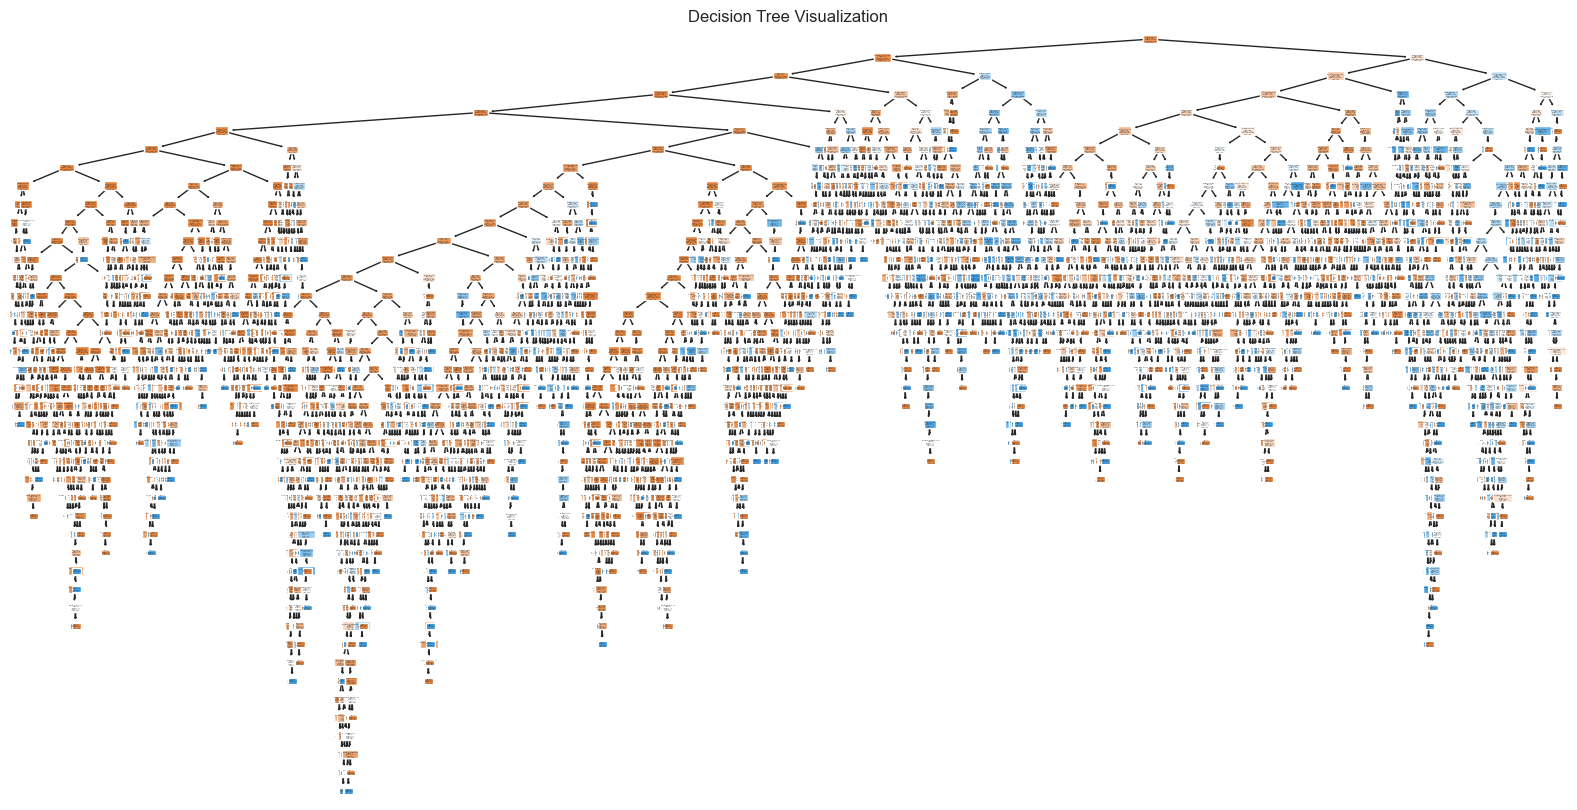

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No','Yes'])
plt.title("Decision Tree Visualization")
plt.show()


**Step12: Feature Importance**

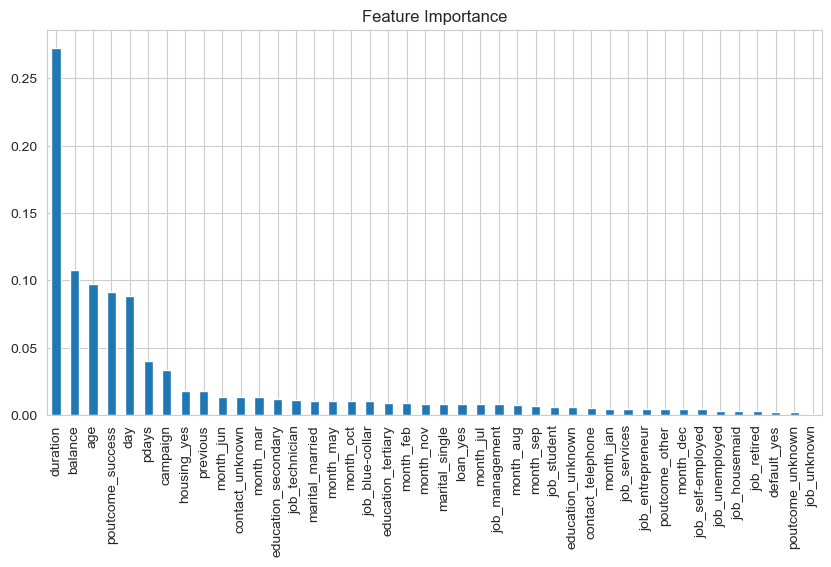

In [28]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()


# INSIGHTS

📊 **Model Performance**

•A Decision Tree Classifier was successfully built to predict whether a customer will purchase a product/service based on demographic and behavioral features.

•The model achieved good prediction performance on the test dataset, demonstrating the ability to identify patterns in customer data.

•Decision Trees are useful because they are easy to interpret and visualize.

📈 **Feature Importance**

•Some features showed stronger influence on customer purchase prediction compared to others.

•Behavioral factors such as previous campaign outcomes, contact duration, and customer interaction history play a significant role.

•Demographic attributes like age or job also contribute to the model’s decision-making process.

🔎 **Data Patterns Observed**

•Customers with certain characteristics were more likely to subscribe to the marketing campaign.

•Previous successful interactions increased the likelihood of purchase.

•Not all demographic features equally affect customer behavior.

💼 **Business Insights**

•Marketing teams can use predictive models to target customers who are more likely to subscribe.

•This helps reduce marketing costs and improve campaign efficiency.

•Data-driven decision-making can improve customer engagement strategies.

**Conclusion**

•The Decision Tree model provides an interpretable way to understand customer behavior.

•Exploratory analysis and visualization helped identify trends and patterns before modeling.

•This project demonstrates how machine learning can support business decision-making.